In [1]:
import numpy as np
import pandas as pd

In [18]:
boston = pd.read_csv('./housing.csv', header=None, delimiter=r"\s+", names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])

# Display the first few rows of the dataset
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [32]:
X = boston[['RM', 'CRIM', 'ZN', 'INDUS', 'NOX']]  # for simplicity, we start with one feature
y = boston['MEDV']

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(r2)

0.4860803650072464


In [36]:
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation MSE:", -cv_scores.mean())

Cross-Validation MSE: 37.3795590303101


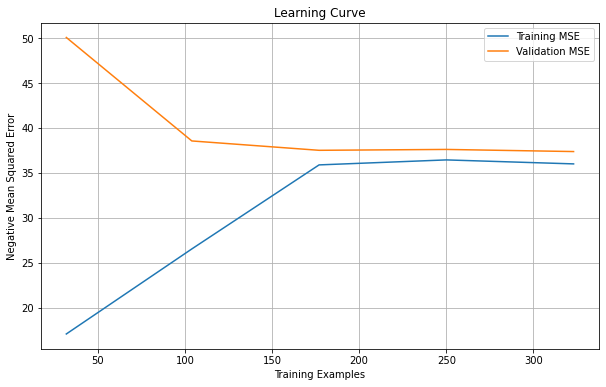

In [37]:
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

train_mean = -np.mean(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training MSE')
plt.plot(train_sizes, test_mean, label='Validation MSE')
plt.xlabel('Training Examples')
plt.ylabel('Negative Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

In [3]:
feature=data.drop(['Price','Address'],axis=1).values
target =data['Price'].values

In [4]:
from sklearn.model_selection import train_test_split
train,test,train_label,test_label=train_test_split(feature,target,test_size=0.33,random_state=222)

/Users/hanisami/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression(fit_intercept=True)
model = reg.fit(train,train_label)
predict = model.predict(test)

In [6]:
predict

array([1935916.6321673 , 1370224.92769688, 1848072.11770162, ...,
       1140985.83182475, 1361974.84737533, 1207705.17120462])

In [8]:
from sklearn.metrics import mean_squared_error

mse_test = mean_squared_error(test_label, predict)
print("Testing MSE:", mse_test)

Testing MSE: 10740241163.419


In [12]:
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score

cv_scores = cross_val_score(reg, train, train_label, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation MSE:", -cv_scores.mean())

Cross-Validation MSE: 10041010651.40738


In [14]:
import matplotlib.pyplot as plt

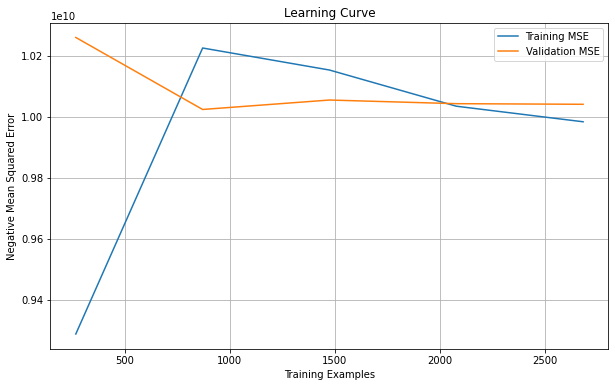

In [15]:
train_sizes, train_scores, test_scores = learning_curve(reg, train, train_label, cv=5, scoring='neg_mean_squared_error')

train_mean = -np.mean(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training MSE')
plt.plot(train_sizes, test_mean, label='Validation MSE')
plt.xlabel('Training Examples')
plt.ylabel('Negative Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()